In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
survived = pd.read_csv('gender_submission.csv')

In [3]:
# join all data sources
data_test = pd.merge(data_test, survived, on='PassengerId', how='inner')
data = pd.concat([data_train, data_test])

In [4]:
# see how many null values are in each column
data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [5]:
# replace null values with the mean of the age column
data['Age'].fillna((data['Age'].mean()), inplace=True)

In [6]:
# drop cabin column since there is no information gain with so many missing values
data.drop(['Cabin'], axis = 1, inplace = True)

In [7]:
# do some discriptive statistics
data[['Age', 'Fare']].describe()

,Age,Fare
count,1309.000000,1308.000000
mean,29.881138,33.295479
std,12.883193,51.758668
min,0.170000,0.000000
25%,22.000000,7.895800
50%,29.881138,14.454200
75%,35.000000,31.275000
max,80.000000,512.329200


In [8]:
data[["Sex", "Age"]].groupby("Sex").mean()

,Age
Sex,
female,28.886950
male,30.430712


In [9]:
data.groupby(['Sex', 'Pclass'])['Fare'].mean()

Sex     Pclass
female  1         109.412385
        2          23.234827
        3          15.324250
male    1          69.888385
        2          19.904946
        3          12.415462
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Sex,Pclass'>

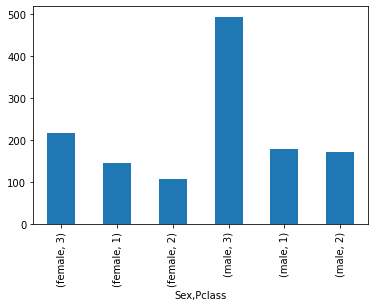

In [10]:
data.groupby(['Sex'])['Pclass'].value_counts().plot.bar()

<AxesSubplot:>

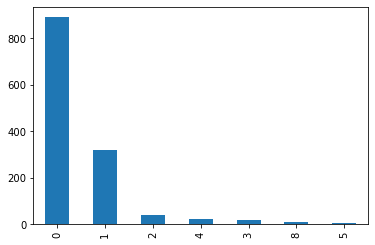

In [11]:
data['SibSp'].value_counts().plot.bar()

<AxesSubplot:>

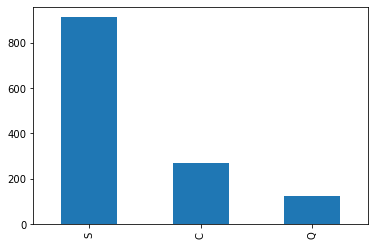

In [12]:
data['Embarked'].value_counts().plot.bar()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

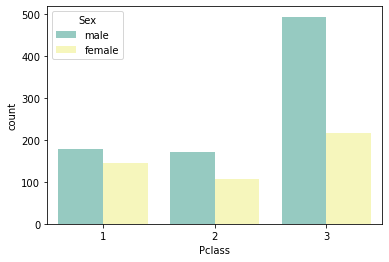

In [13]:
sns.countplot(x='Pclass', hue='Sex', data=data, palette='Set3')

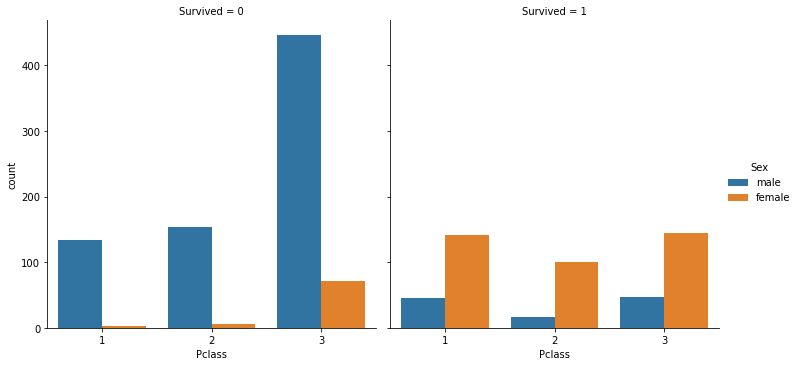

In [14]:
sns.catplot(x='Pclass', hue='Sex', col='Survived', kind='count', data=data)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

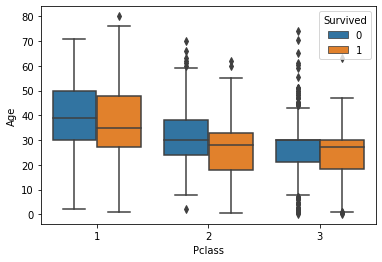

In [15]:
# boxplot
sns.boxplot(x=data['Pclass'], y=data["Age"], hue=data['Survived'])

[(0.0, 300.0)]

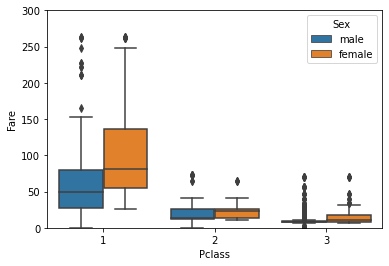

In [16]:
ax = sns.boxplot(x=data['Pclass'], y=data['Fare'], hue=data['Sex'])
ax.set(ylim=(0,300))

[(0.0, 100.0)]

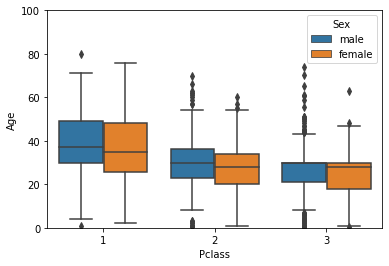

In [17]:
ax = sns.boxplot(x=data['Pclass'], y=data['Age'], hue=data['Sex'])
ax.set(ylim=(0,100))

In [18]:
# training a model now

In [19]:
# drop some columns
data.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

In [20]:
# drop columns with NaN values
data.dropna(inplace = True)

In [21]:
features = ["Pclass","Sex", "Age","SibSp", "Parch","Fare","Embarked", "Survived"] 
data = pd.get_dummies(data[features])

In [22]:
# drop again because of dummy variable trap
data.drop(['Sex_male', 'Embarked_C'], axis = 1, inplace = True)

In [23]:
data.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,0,0,1
1,1,38.0,1,0,71.2833,1,1,0,0
2,3,26.0,0,0,7.9250,1,1,0,1
3,1,35.0,1,0,53.1000,1,1,0,1
4,3,35.0,0,0,8.0500,0,0,0,1


In [24]:
# order the columns the way I like
column_names = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Embarked_Q', 'Embarked_S', 'Survived']
data.columns = column_names

In [25]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [27]:
data.iloc[0:5,:-1]

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,0,0
1,1,38.0,1,0,71.2833,1,1,0
2,3,26.0,0,0,7.9250,1,1,0
3,1,35.0,1,0,53.1000,1,1,0
4,3,35.0,0,0,8.0500,0,0,0


In [28]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train= sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [29]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_pred = classifier.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 35  52]
 [  3 172]]


0.7900763358778626

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

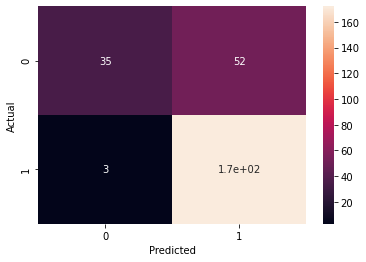

In [32]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [34]:
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.7977099236641222

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

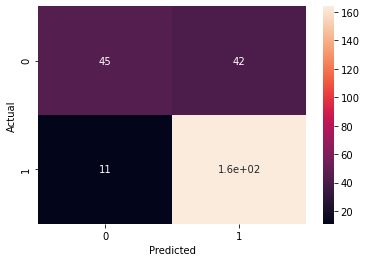

In [35]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [36]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [37]:
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.7824427480916031

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

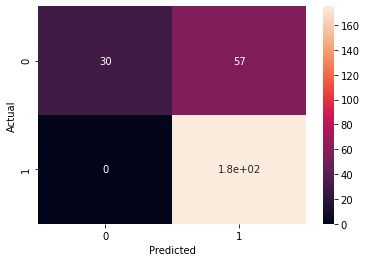

In [38]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)